## Assignment no 47 EDA 1 (24.3.23)

### Wine and Student Dataset

# Q1. What are the key features of the wine quality data set? Discuss the importance of each feature in
predicting the quality of wine.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_wine = pd.read_csv('winequality-red.csv')
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# Key features of key features of the wine quality data set are as follows

df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
# finding correlation between each varible in tabular format

df_quality_corr = df_wine.corr(method = 'spearman', numeric_only=True)['quality']
pd.DataFrame(df_quality_corr)

,quality
fixed acidity,0.114084
volatile acidity,-0.380647
citric acid,0.213481
residual sugar,0.032048
chlorides,-0.189922
free sulfur dioxide,-0.056901
total sulfur dioxide,-0.196735
density,-0.177074
pH,-0.043672
sulphates,0.377060


The above dataframe shows the correlation of each variable with quality which is positive or neagtive, weakly correlated or strongly.

We can also get the Correlation in a visualized manner by plotting heatmap as follows:

<AxesSubplot: >

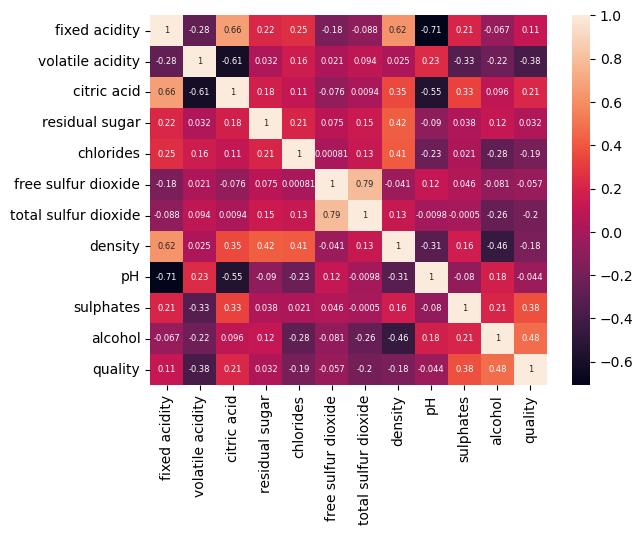

In [5]:
sns.heatmap(df_wine.corr(method = 'spearman', numeric_only=True), annot = True, annot_kws={"size":6})

# Q2. How did you handle missing data in the wine quality data set during the feature engineering process?
Discuss the advantages and disadvantages of different imputation techniques.

Ans - The step by step process for handling missing data within wine quality dataset is as follows:

In [6]:
# Finding if there are any null values within dataset and getting exact count for it.
df_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There are no any missing values within wine quality dataset, but there were any, firstly I will chech the datatypes of each variable by df_wine.dtypes as shown below and then decide which imputation techniques should to be used eg. 
1. If the variable is Continuous or Numerical type (Either Integer or Float) and there are no specific amount of OUTLIERS are present then the mean imputation technique should to be used.
2. If the variable is Continuous or Numerical type (Either Integer or Float) and there are specific amount of OUTLIERS are present then the median imputation technique should to be used.
3. If the variable is of Categorical or Discrete type then mode imputation technique should to be used.

In [7]:
df_wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

1. Complete Case Analysis(CCA)

This is a quite straightforward method of handling the Missing Data, which directly removes the rows that have missing data i.e we consider only those rows where we have complete data i.e data is not missing. This method is also popularly known as “Listwise deletion”.

Assumptions:-
Data is Missing At Random(MAR).
Missing data is completely removed from the table.

Advantages:-
Easy to implement.
No Data manipulation required.

Limitations:-
Deleted data can be informative.
Can lead to the deletion of a large part of the data.
Can create a bias in the dataset, if a large amount of a particular type of variable is deleted from it.
The production model will not know what to do with Missing data.

When to Use:-
Data is MAR(Missing At Random).
Good for Mixed, Numerical, and Categorical data.
Missing data is not more than 5% – 6% of the dataset.
Data doesn’t contain much information and will not bias the dataset.


2. Arbitrary Value Imputation

This is an important technique used in Imputation as it can handle both the Numerical and Categorical variables. This technique states that we group the missing values in a column and assign them to a new value that is far away from the range of that column. Mostly we use values like 99999999 or -9999999 or “Missing” or “Not defined” for numerical & categorical variables.

Assumptions:-
Data is not Missing At Random.
The missing data is imputed with an arbitrary value that is not part of the dataset or Mean/Median/Mode of data.

Advantages:-
Easy to implement.
We can use it in production.
It retains the importance of “missing values” if it exists.

Disadvantages:-
Can distort original variable distribution.
Arbitrary values can create outliers.
Extra caution required in selecting the Arbitrary value.

When to Use:-
When data is not MAR(Missing At Random).
Suitable for All.

3. Frequent Category Imputation - This technique says to replace the missing value with the variable with the highest frequency or in simple words replacing the values with the Mode of that column. This technique is also referred to as Mode Imputation.

Assumptions:-
Data is missing at random.
There is a high probability that the missing data looks like the majority of the data.

Advantages:-
Implementation is easy.
We can obtain a complete dataset in very little time.
We can use this technique in the production model.

Disadvantages:-
The higher the percentage of missing values, the higher will be the distortion.
May lead to over-representation of a particular category.
Can distort original variable distribution.

When to Use:-
Data is Missing at Random(MAR)
Missing data is not more than 5% – 6% of the dataset.


4. Statistical Values imputation

This is done using statistical values like mean, median. However, none of these guarantees unbiased data, especially if there are many missing values.

Mean is most useful when the original data is not skewed, while the median is more robust, not sensitive to outliers, and thus used when data is skewed.

In a normally distributed data, one can get all the values that are within 2 standard deviations from the mean. Next, fill in the missing values by generating random numbers between (mean — 2 std) & (mean + 2 std)

# Q3. What are the key factors that affect students' performance in exams? How would you go about analyzing these factors using statistical techniques?

In [8]:
df_student = pd.read_csv('students.csv')
df_student.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [9]:
df_student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


- To analyze how the key factors that affect students' performance in exams using statistical techniques we have do following steps :
1. To check whether there are any null values, if any perform imputation method as respective datatype.
2. To remove duplicates if any.
3. Convert all marks into percentage first and then visualize wth repect to each category for the effect of them on students performance on exam.

In [10]:
# 1. To check whether there are any null values, if any perform imputation method as respective datatype.
df_student.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

No any missing values within Dataset, CHECK OK...

In [11]:
# 2. To remove duplicates if any.
df_student.duplicated().sum()

0

No any duplicate values within Dataset, CHECK OK...

In [12]:
# Convert all marks into percentage first and then visualize wth repect to each category for the effect of them on students 
# performance on exam.

df_student['Percentage'] = (df_student['math_score'] + df_student['reading_score'] + df_student['writing_score'])/3
df_student['Percentage'] = df_student['Percentage'].round(2)
df_student.drop(columns=['math_score','reading_score','writing_score'], axis = 1, inplace=True)
df_student.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,Percentage
0,female,group B,bachelor's degree,standard,none,72.67
1,female,group C,some college,standard,completed,82.33
2,female,group B,master's degree,standard,none,92.67
3,male,group A,associate's degree,free/reduced,none,49.33
4,male,group C,some college,standard,none,76.33


In [13]:
df_student.nunique()

gender                           2
race_ethnicity                   5
parental_level_of_education      6
lunch                            2
test_preparation_course          2
Percentage                     194
dtype: int64

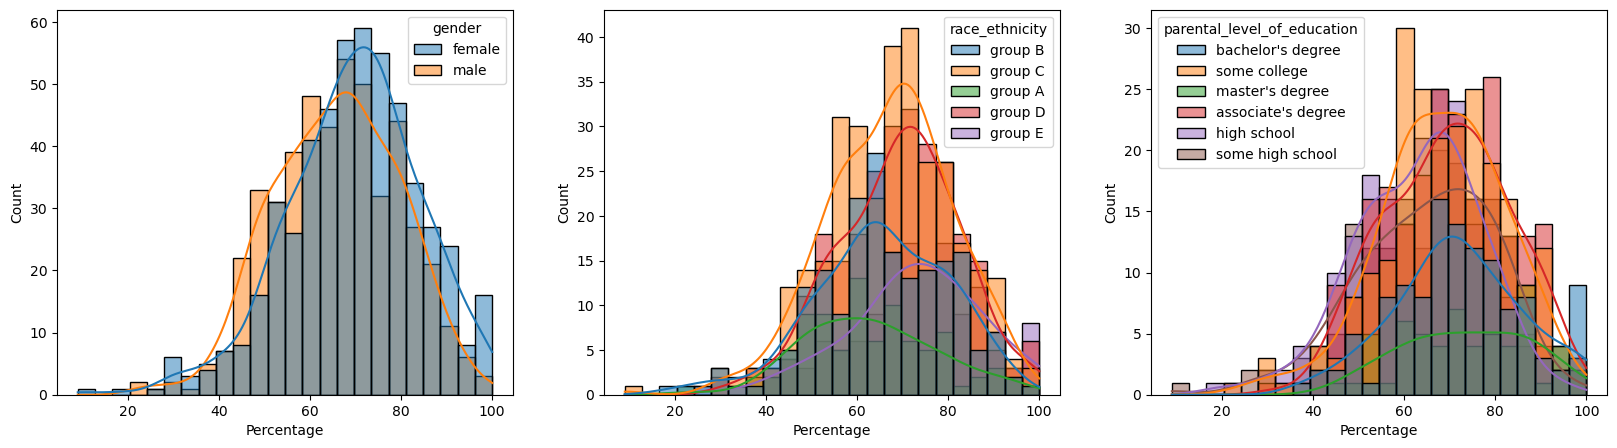

In [14]:
plt.subplots(1,3,figsize=(20,5))
plt.subplot(131)
sns.histplot(data=df_student,x='Percentage',kde=True, hue = 'gender') #plot no 1
plt.subplot(132)
sns.histplot(data=df_student,x='Percentage',kde=True, hue='race_ethnicity') #plot no 2
plt.subplot(133)
sns.histplot(data=df_student,x='Percentage',kde=True, hue='parental_level_of_education') #plot no 3
plt.show()

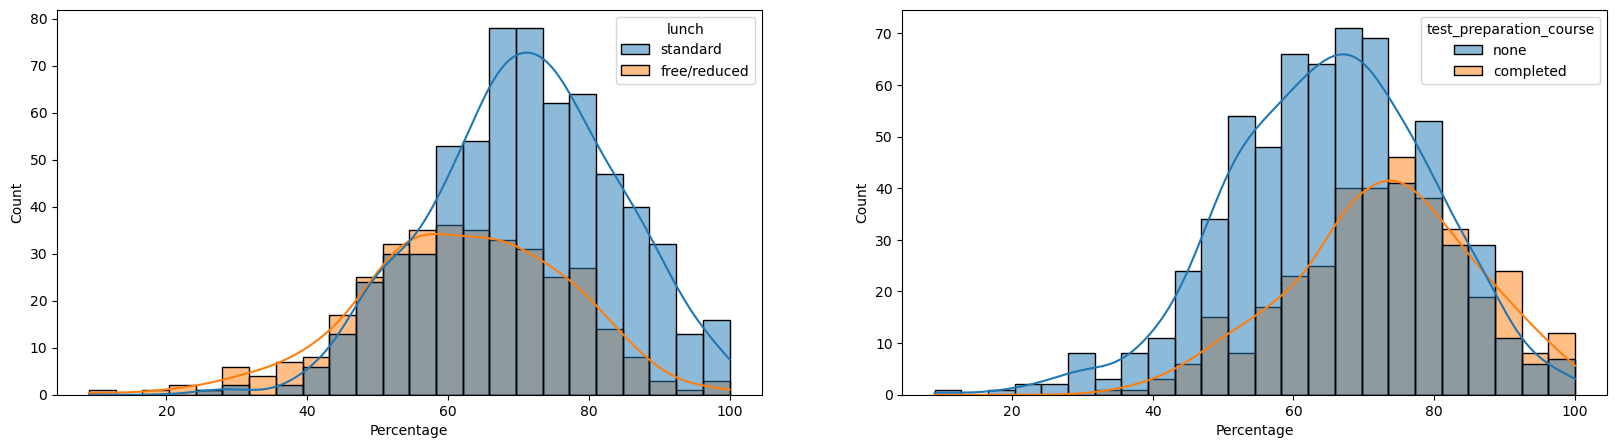

In [15]:
plt.subplots(1,2,figsize=(20,5))
plt.subplot(121)
sns.histplot(data=df_student,x='Percentage',kde=True, hue = 'lunch') #plot no 4
plt.subplot(122)
sns.histplot(data=df_student,x='Percentage',kde=True, hue='test_preparation_course') #plot no 5
plt.show()

### Statistical insights about features with reapect to visualization in detail are as follows:
1. Within gender category females have more average percentage compared to males. (Left skewed plot)
2. Within race ethnicity category group C and group D have more average percentage compared to others. (Left skewed plot)
3. There is no such relation with parents degree and marks of respective student.
4. Those who have standard type of lunch before exam have more average percentage than others.
5. Those who have not completed test preparation course they have below average percentage.

# Q4. Describe the process of feature engineering in the context of the student performance data set. How did you select and transform the variables for your model?

In [16]:
df_student.dtypes

gender                          object
race_ethnicity                  object
parental_level_of_education     object
lunch                           object
test_preparation_course         object
Percentage                     float64
dtype: object

Now as per dataset 5 variables are of 'object' datatype which we have to convert or do encoding for our Machine Learning model as follows:

In [17]:
# One Hot Encoding for 'gender' variable
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder() # creating instance

In [18]:
encoded = encoder.fit_transform(df_student[['gender']]).toarray()
df_encoded = pd.DataFrame(encoded,columns=encoder.get_feature_names_out())
df_student = pd.concat([df_student, df_encoded], axis = 1)
df_student.drop(columns='gender', inplace=True)
df_student.head()

,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,Percentage,gender_female,gender_male
0,group B,bachelor's degree,standard,none,72.67,1.0,0.0
1,group C,some college,standard,completed,82.33,1.0,0.0
2,group B,master's degree,standard,none,92.67,1.0,0.0
3,group A,associate's degree,free/reduced,none,49.33,0.0,1.0
4,group C,some college,standard,none,76.33,0.0,1.0


In [19]:
df_student['parental_level_of_education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [20]:
# One Hot Encoding for 'parental_level_of_education' variable
encoder.fit_transform(df_student[['parental_level_of_education']]).toarray()
pd.DataFrame(encoder.fit_transform(df_student[['parental_level_of_education']]).toarray()
             ,columns=encoder.get_feature_names_out())
df_student = pd.concat([df_student, pd.DataFrame(encoder.fit_transform(df_student[['parental_level_of_education']]).toarray()
                                                 ,columns=encoder.get_feature_names_out())], axis = 1)
df_student.drop(columns='parental_level_of_education', inplace=True)
df_student.head()

,race_ethnicity,lunch,test_preparation_course,Percentage,gender_female,gender_male,parental_level_of_education_associate's degree,parental_level_of_education_bachelor's degree,parental_level_of_education_high school,parental_level_of_education_master's degree,parental_level_of_education_some college,parental_level_of_education_some high school
0,group B,standard,none,72.67,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,group C,standard,completed,82.33,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,group B,standard,none,92.67,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,group A,free/reduced,none,49.33,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,group C,standard,none,76.33,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [21]:
df_student['race_ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [22]:
# One Hot Encoding for 'race_ethnicity' variable
encoder.fit_transform(df_student[['race_ethnicity']]).toarray()
pd.DataFrame(encoder.fit_transform(df_student[['race_ethnicity']]).toarray()
             ,columns=encoder.get_feature_names_out())
df_student = pd.concat([df_student, pd.DataFrame(encoder.fit_transform(df_student[['race_ethnicity']]).toarray()
                                                 ,columns=encoder.get_feature_names_out())], axis = 1)
df_student.drop(columns='race_ethnicity', inplace=True)
df_student.head()

,lunch,test_preparation_course,Percentage,gender_female,gender_male,parental_level_of_education_associate's degree,parental_level_of_education_bachelor's degree,parental_level_of_education_high school,parental_level_of_education_master's degree,parental_level_of_education_some college,parental_level_of_education_some high school,race_ethnicity_group A,race_ethnicity_group B,race_ethnicity_group C,race_ethnicity_group D,race_ethnicity_group E
0,standard,none,72.67,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,standard,completed,82.33,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,standard,none,92.67,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,free/reduced,none,49.33,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,standard,none,76.33,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [23]:
df_student['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [24]:
# One Hot Encoding for 'race_ethnicity' variable
encoder.fit_transform(df_student[['lunch']]).toarray()
pd.DataFrame(encoder.fit_transform(df_student[['lunch']]).toarray()
             ,columns=encoder.get_feature_names_out())
df_student = pd.concat([df_student, pd.DataFrame(encoder.fit_transform(df_student[['lunch']]).toarray()
                                                 ,columns=encoder.get_feature_names_out())], axis = 1)
df_student.drop(columns='lunch', inplace=True)
df_student.head()

,test_preparation_course,Percentage,gender_female,gender_male,parental_level_of_education_associate's degree,parental_level_of_education_bachelor's degree,parental_level_of_education_high school,parental_level_of_education_master's degree,parental_level_of_education_some college,parental_level_of_education_some high school,race_ethnicity_group A,race_ethnicity_group B,race_ethnicity_group C,race_ethnicity_group D,race_ethnicity_group E,lunch_free/reduced,lunch_standard
0,none,72.67,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,completed,82.33,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,none,92.67,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,none,49.33,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,none,76.33,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [25]:
df_student['test_preparation_course'].unique()

array(['none', 'completed'], dtype=object)

In [26]:
# One Hot Encoding for 'race_ethnicity' variable
encoder.fit_transform(df_student[['test_preparation_course']]).toarray()
pd.DataFrame(encoder.fit_transform(df_student[['test_preparation_course']]).toarray()
             ,columns=encoder.get_feature_names_out())
df_student = pd.concat([df_student, pd.DataFrame(encoder.fit_transform(df_student[['test_preparation_course']]).toarray()
                                                 ,columns=encoder.get_feature_names_out())], axis = 1)
df_student.drop(columns='test_preparation_course', inplace=True)
df_student.head()

,Percentage,gender_female,gender_male,parental_level_of_education_associate's degree,parental_level_of_education_bachelor's degree,parental_level_of_education_high school,parental_level_of_education_master's degree,parental_level_of_education_some college,parental_level_of_education_some high school,race_ethnicity_group A,race_ethnicity_group B,race_ethnicity_group C,race_ethnicity_group D,race_ethnicity_group E,lunch_free/reduced,lunch_standard,test_preparation_course_completed,test_preparation_course_none
0,72.67,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,82.33,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,92.67,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,49.33,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,76.33,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [27]:
# Move first column to the Last
temp_cols=df_student.columns.tolist()
new_cols=temp_cols[1:] + temp_cols[0:1]
df_student=df_student[new_cols]
df_student.head()

,gender_female,gender_male,parental_level_of_education_associate's degree,parental_level_of_education_bachelor's degree,parental_level_of_education_high school,parental_level_of_education_master's degree,parental_level_of_education_some college,parental_level_of_education_some high school,race_ethnicity_group A,race_ethnicity_group B,race_ethnicity_group C,race_ethnicity_group D,race_ethnicity_group E,lunch_free/reduced,lunch_standard,test_preparation_course_completed,test_preparation_course_none,Percentage
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,72.67
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,82.33
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,92.67
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,49.33
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,76.33


# Q5. Load the wine quality data set and perform exploratory data analysis (EDA) to identify the distribution of each feature. Which feature(s) exhibit non-normality, and what transformations could be applied to these features to improve normality?

## Exploratory Data Analysis on Wine Dataset

In [28]:
import pandas as pd

In [29]:
df_wine = pd.read_csv('winequality-red.csv')

In [30]:
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [31]:
df_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [32]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [33]:
df_wine.shape, df_wine.size

((1599, 12), 19188)

In [34]:
df_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [35]:
df_wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [36]:
df_wine.duplicated().sum(), df_wine.shape

(240, (1599, 12))

In [37]:
df_wine.drop_duplicates(inplace = True), df_wine.shape

(None, (1359, 12))

In [38]:
df_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot: >

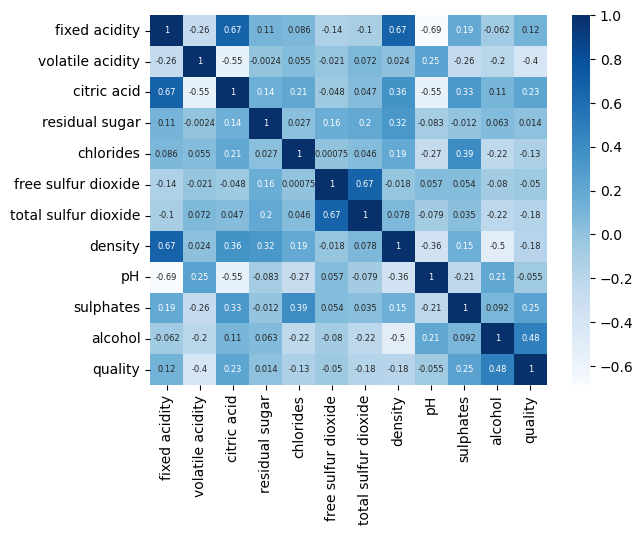

In [40]:
sns.heatmap(df_wine.corr(),annot=True,cmap = 'Blues', annot_kws={'size':6} )

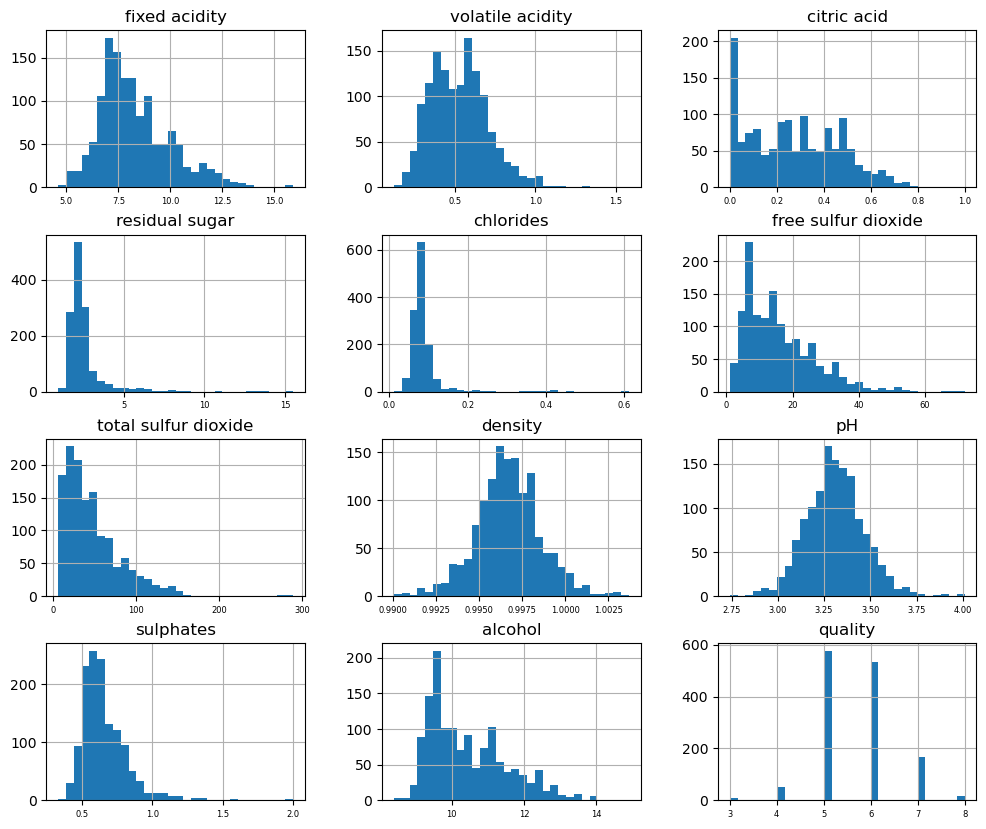

In [41]:
df_wine.hist(figsize=(12,10), xlabelsize=6, bins=30)
plt.show()

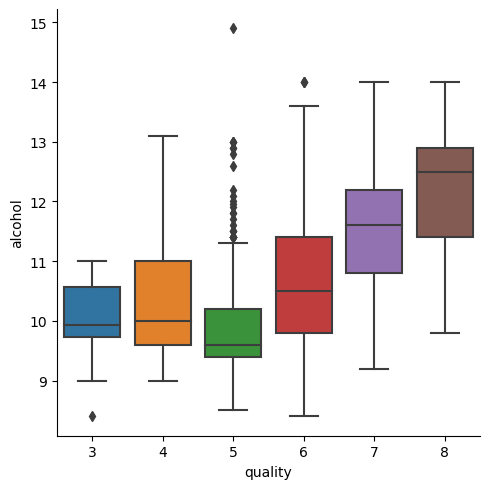

In [42]:
##categorical Plot
sns.catplot(x='quality', y='alcohol', data=df_wine, kind="box")

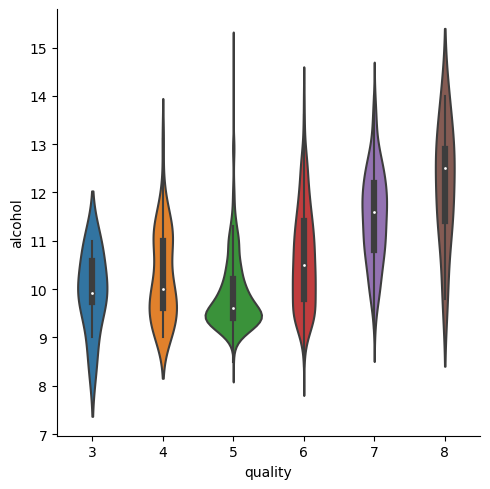

In [43]:
##categorical Plot
sns.catplot(x='quality', y='alcohol', data=df_wine, kind="violin")

Q6. Using the wine quality data set, perform principal component analysis (PCA) to reduce the number of
features. What is the minimum number of principal components required to explain 90% of the variance in
the data?


Note:- We can use Wine quality dataset and Student Performance Data set as per the discussion in lecture.

In [44]:
from sklearn.preprocessing import MinMaxScaler

# Standardizing the features
wine_rescaled = MinMaxScaler().fit_transform(df_wine)

In [47]:
pd.DataFrame(wine_rescaled).head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6
4,0.247788,0.369863,0.00,0.061644,0.105175,0.169014,0.120141,0.567548,0.606299,0.137725,0.153846,0.4


In [48]:
# reducing dimensions (for better visualization) with PCA

from sklearn.decomposition import PCA

pca = PCA(n_components = 0.90)

pca.fit(wine_rescaled)

reduced = pca.transform(wine_rescaled)

pca = PCA().fit(wine_rescaled)

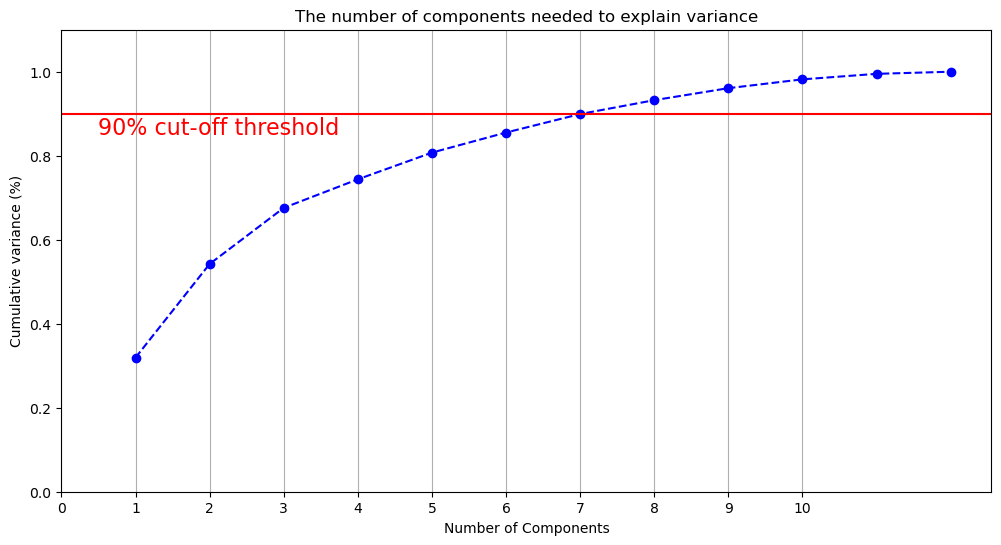

Minimum number of principal components required to explain 90% of variance: 7


In [53]:
import numpy as np

plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 13, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 11, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.90, color='r', linestyle='-')
plt.text(0.5, 0.85, '90% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

n_components = np.argmax(y >= 0.9)
print(f"Minimum number of principal components required to explain 90% of variance: {n_components}")

## Conclusion
THe Minimum number of principal components required to explain 90% of variance are 7 in number.
